# Using Astropy Cosmology

Here is the [documentation](https://docs.astropy.org/en/stable/cosmology/) for `astropy.cosmology`. The base class you'll usually use under the hood is `astropy.cosmology.core.Cosmology`.  There are specific cosmologies built on top of that for specific parameter choices, etc.  

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u

Above, we've imported the `FlatLambdaCDM` cosmology.  For this, a flat geometry is assumed, so at a minimum, you just have to specify Hubble-Lemaitre constant and omega matter. Let's instantiate a "standard" cosmology (i.e. H0=70 km/s/Mpc, Om0=0.3) and plot the different distances as a function of redshift

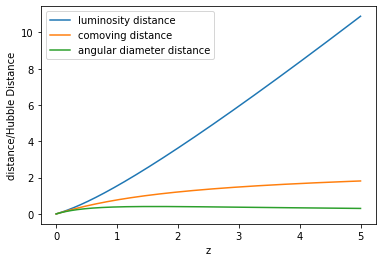

In [16]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
z = np.linspace(0,5,500)
plt.plot(z,cosmo.luminosity_distance(z).to_value(u.Mpc)/cosmo.hubble_distance.to_value(u.Mpc),label='luminosity distance')
plt.plot(z,cosmo.comoving_distance(z).to_value(u.Mpc)/cosmo.hubble_distance.to_value(u.Mpc),label='comoving distance')
plt.plot(z,cosmo.angular_diameter_distance(z).to_value(u.Mpc)/cosmo.hubble_distance.to_value(u.Mpc),label='angular diameter distance')
plt.xlabel('z')
plt.ylabel('distance/Hubble Distance')
plt.legend()

Now let's look at volumes.  There are a few useful quantities.  First is the differential comoving volume per unit redshift and solid angle $\frac{dV}{dzd\Omega}$.  This quantity is useful when you need to integrate a density over some volume of the universe.  There's also the quantity $\frac{1}{1+z}\frac{dV}{dzd\Omega}$. This is the differential comoving volume times a time-dilation factor.  That's important when you want to integrate a *rate density* of events over the universe to figure out a number of detections at Earth, because it accounts for different clocks here and at the source.

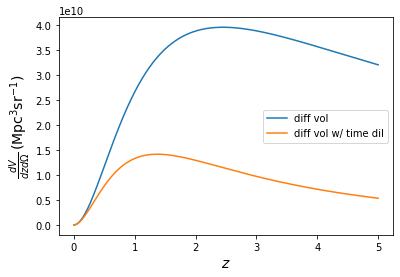

In [14]:
plt.plot(z,cosmo.differential_comoving_volume(z).to_value(u.Mpc**3/u.sr),label='diff vol')
plt.plot(z,cosmo.differential_comoving_volume(z).to_value(u.Mpc**3/u.sr)/(1.+z),label='diff vol w/ time dil')
plt.ylabel(r'$\frac{dV}{dzd\Omega}\,(\mathrm{Mpc}^3\mathrm{sr}^{-1})$',fontsize=14)
plt.xlabel(r'$z$',fontsize=14)
plt.legend()

One can also look at the total comoving volume out to some redshift. This is useful if you have a constant density (per comoving volume) of objects and you want to figure out how many objects there are out to that redshift.  


Text(0, 0.5, '$V(<z)\\,(\\mathrm{Mpc}^3)$')

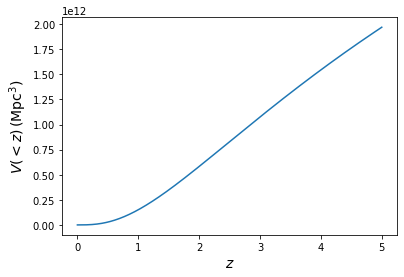

In [19]:
plt.plot(z,cosmo.comoving_volume(z).to_value(u.Mpc**3),label='diff vol')
plt.xlabel('$z$',fontsize=14)
plt.ylabel('$V(<z)\,(\mathrm{Mpc}^3)$',fontsize=14)

One thing that's helpful is to define interpolants for the above functions if you plan to make a lot of calls, because astropy does the underlying integrals for each call.  Here's an example:

In [26]:
setup="""
import numpy as np
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
z_grid = np.linspace(0,7,1000)
dL_of_z_grid = cosmo.luminosity_distance(z_grid).to_value(u.Mpc)
z_query = np.linspace(0.1,5,500)
from scipy.interpolate import interp1d
interp = interp1d(z_grid,dL_of_z_grid)
"""
import timeit
ntrials=1000
astropy_time = timeit.timeit('cosmo.luminosity_distance(z_query).to_value(u.Mpc)',setup=setup,number=ntrials)
interp_time = timeit.timeit('interp(z_query)',setup=setup,number=ntrials)

print(f'Using an interpolant is {astropy_time/interp_time} times faster than calling astropy directly for luminosity distance')


Using an interpolant is 10.183255755695196 times faster than calling astropy directly for luminosity distance
